# What is this Project?

This is my approach on the "Titanic - Machine Learning from Disaster" machine learning competition. </br>

The objective here is to try and predict if a passenger survived or not the Titanic disaster (more on that on the next section). </br>

Competition original link: https://www.kaggle.com/c/titanic/overview

These are the contents of this project:

* Exploratory Data Analysis
* Feature Engineering
* Classification Algorithms:
    * Random Forest
    * Decision Tree
    * XGBoost
    * Logistic Regression
    * Gradient Boosting Classifier


Author: Augusto Gontijo </br>
LinkedIn: https://www.linkedin.com/in/augusto-gontijo/?locale=en_US </br>
GitHub: https://github.com/augusto-gontijo

# What was the Sinking of the Titanic?

The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time)[a] on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.

Source: https://en.wikipedia.org/wiki/Sinking_of_the_Titanic

# Dependencies

This project was developed using:

* Python Version: 3.8.10
* Numpy version: 1.22.2
* Pandas version: 1.4.1
* SKLearn version: 1.0.2
* Seaborn version: 0.11.2
* matplotlib version: 3.5.1

(you might have trouble if trying to use different versions)

# Imports

## Libraries

Importing some libraries that we'll use further down this project.

In [1]:
# Data manipulation libs
import pandas as pd
import numpy as np

# Data visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
sns.set_style('whitegrid')

# Machine Learining classification libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Metrics libs
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier

# Dataset split lib
from sklearn.model_selection import train_test_split

# Cross validation libs:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Encoding lib
from sklearn.preprocessing import OneHotEncoder

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


C:\Users\Augusto\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data

Importing the CSV files.

**Remember to alter the file path to the folder path on your computer**

In [2]:
train_raw = pd.read_csv("C:/... YOUR COMPUTER PATH .../Data/train.csv")
test_raw = pd.read_csv("C:/... YOUR COMPUTER PATH .../Data/test.csv")

test_id = test_raw['PassengerId']

# Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

More on: https://en.wikipedia.org/wiki/Exploratory_data_analysis

## Understanding the data

In this section we'll explore the raw data in order to understand it before modelling.

More on the official data here: https://www.kaggle.com/c/titanic/data

### Data Overview

In [3]:
print("The 'train' dataset contains {} rows and {} columns.".format(train_raw.shape[0], train_raw.shape[1]))
print("The 'test' dataset contains {} rows and {} columns.".format(test_raw.shape[0], test_raw.shape[1]))

The 'train' dataset contains 891 rows and 12 columns.
The 'test' dataset contains 418 rows and 11 columns.


In [4]:
# Checking out the first 10 rows of the dataset

train_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Dictionary

Variable | Definition | Key
--- | --- | ---
survival | Survival | 0 = No, 1 = Yes
pclass | Ticket class | 	1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex | 	
Age | Age in years | 
sibsp | # of siblings / spouses aboard the Titanic | 	
parch | # of parents / children aboard the Titanic | 	
ticket | Ticket number |
fare | Passenger fare |	
cabin | Cabin number |	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES) <br />
1st = Upper <br />
2nd = Middle <br />
3rd = Lower <br />

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 <br />

sibsp: The dataset defines family relations in this way... <br />
Sibling = brother, sister, stepbrother, stepsister <br />
Spouse = husband, wife (mistresses and fiancés were ignored) <br />

parch: The dataset defines family relations in this way... <br />
Parent = mother, father <br />
Child = daughter, son, stepdaughter, stepson <br />
Some children travelled only with a nanny, therefore parch=0 for them.

### Statistical Summary

In [5]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Missing Data

Checking for NA (not available) data.

Some observations:

* There are a high count of NA values in the columns 'Age' and 'Cabin' (in both 'train' and 'test' datasets).
* We can also observe 2 NA values in the 'Embarked' column of the 'train' dataset.
* And 1 NA value in the 'Fare' column.

We'll deal with all missing data in the 'Feature Engineering' section further along.

In [7]:
train_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_raw.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Analyzing the data

### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. </br>
Each cell in the table shows the correlation between two variables.

<AxesSubplot:>

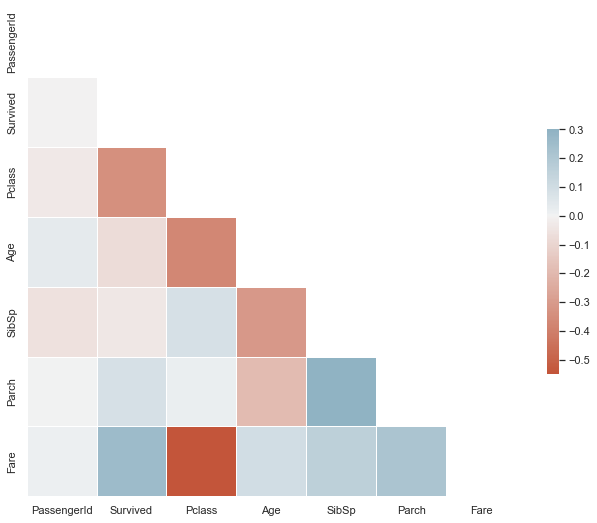

In [9]:
corr = train_raw.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In the matrix above, the correlation value can vary between -1 (negative correlation), 0 (no correlation) and 1 (positive correlation).

Some observations:

* There are a **positive** correlation between 'Fare' and 'Survived'. This can mean that passengers with higher socioeconomical status had more favorable survival odds.
* There are a **negative** correlation between 'Pclass' and 'Survived'. This can also mean that passengers with higher socioeconomical status had more favorable survival odds.
* There are a **positive** correlation between 'SibSp' and 'Parch'. This can mean that people that had siblings/spouses could also have parentes/children aboard.
* There are a **negative** correlation between 'Fare' and 'Pclass'. This can mean that as the 'Fare' value goes up (in $), the 'Pclass' goes down (3rd, 2nd and 1st).

### Class Analysis

As we can see, the great majority of the passengers were on the 3rd class. </br>
In absolute numbers, the 3 classes had a similar amount of survivors. </br>
When we analyze the survival rate of each class individually, we can see that the survival rate of the 1st class was much higher. </br>

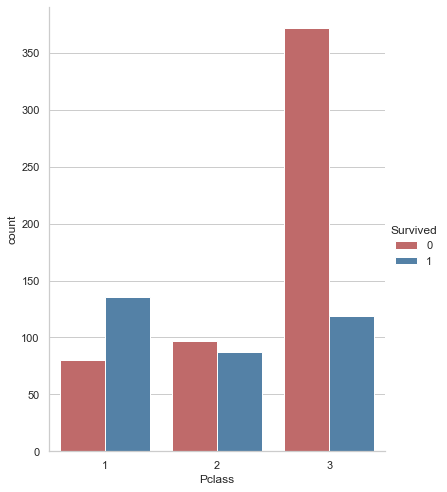

,Class,Survival Rate
0,1st,62.96
1,2nd,47.28
2,3rd,24.24


In [10]:
data = train_raw.filter(items = ["Survived", "Pclass"])

sns.catplot(x = 'Pclass',             
            kind = "count", 
            hue="Survived", 
            data = data,              
            palette = {0: 'indianred', 1: 'steelblue'},
            height = 7, 
            aspect = .8
            )

plt.show()

first = (train_raw["Survived"][train_raw["Pclass"] == 1].value_counts(normalize = True)[1]*100).round(2)
second = (train_raw["Survived"][train_raw["Pclass"] == 2].value_counts(normalize = True)[1]*100).round(2)
third = (train_raw["Survived"][train_raw["Pclass"] == 3].value_counts(normalize = True)[1]*100).round(2)

class_df = pd.DataFrame({
    "Class": ["1st", "2nd", "3rd"],
    "Survival Rate": [first, second, third]})

# Sorting the 'Survival Rate':
class_df.sort_values(by = 'Survival Rate', ascending=False) 

### Age Analysis

There's no much difference between the ages of survivors and non-survivors.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

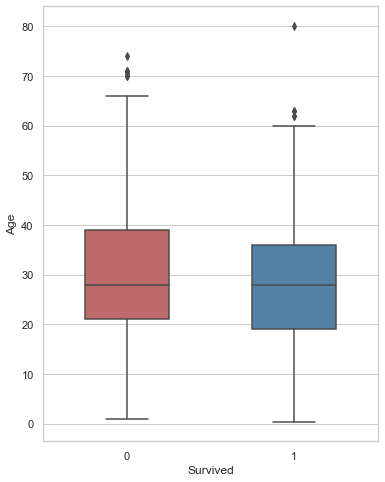

In [11]:
data = train_raw.filter(items = ["Survived", "Age"])

dims = (6, 8)
fig, ax = plt.subplots(figsize = dims)

sns.boxplot(x = "Survived", 
            y = "Age", 
            data = data, 
            ax = ax, 
            width = 0.5,
            palette = {0: 'indianred', 1: 'steelblue'}
            )

### Sibling / Spouse Analysis

The vast majority of the passengers were travelling alone.

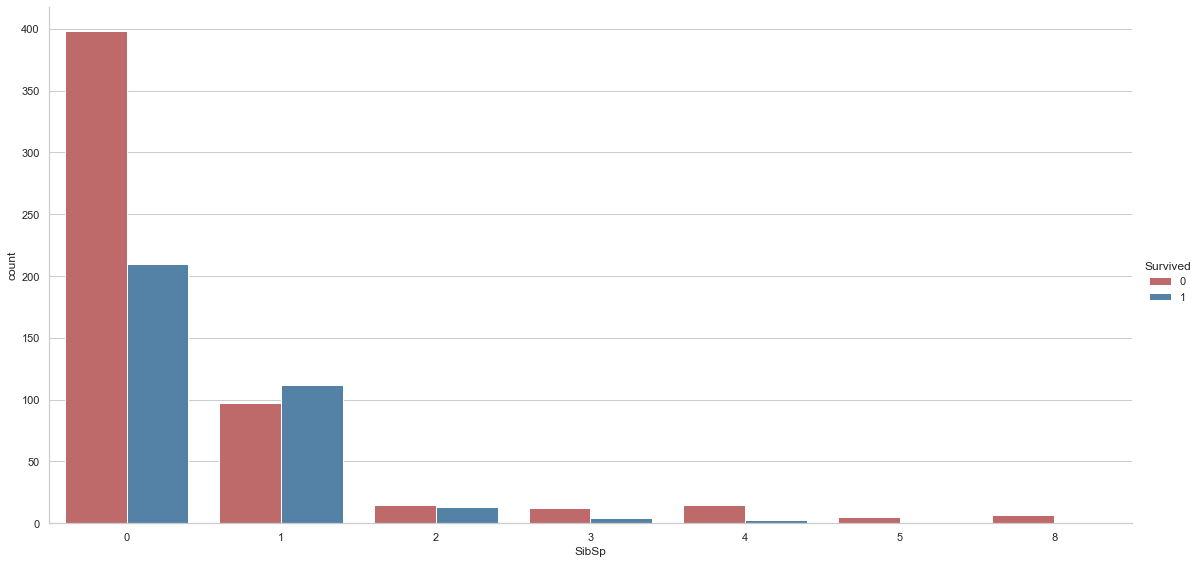

In [12]:
sns.catplot(x = 'SibSp', 
            hue="Survived", 
            kind = "count",              
            data = train_raw, 
            height = 8, 
            aspect = 2,
            palette = {0: 'indianred', 1: 'steelblue'}
            )

### Parent / Child Analysis

The vast majority of the passengers were travelling alone.

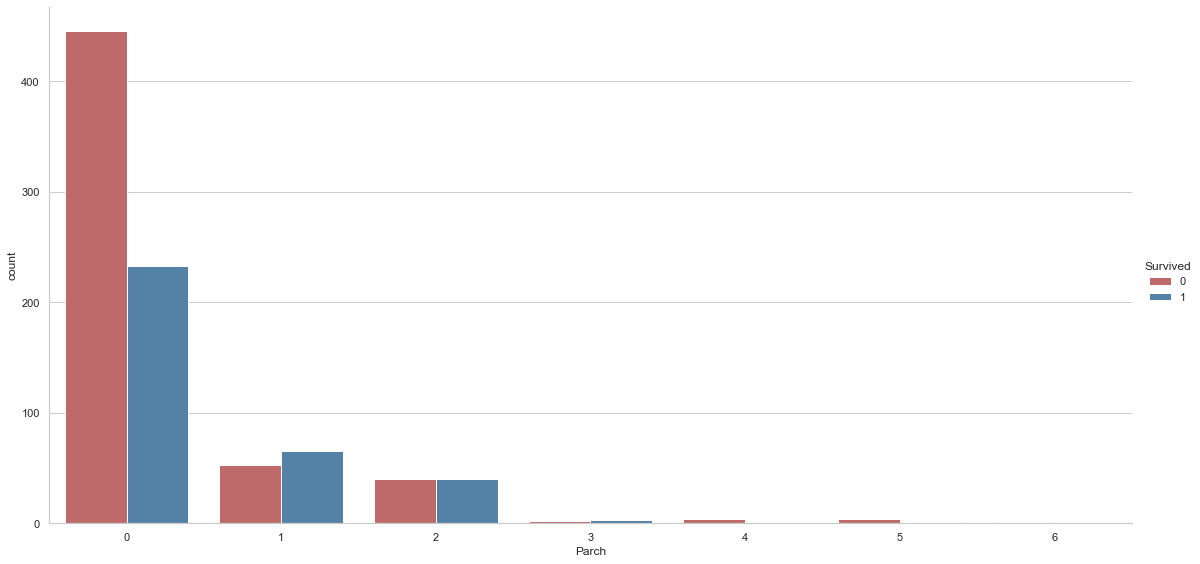

In [13]:
sns.catplot(x = 'Parch', 
            hue="Survived", 
            kind = "count",            
            data = train_raw, 
            height = 8, 
            aspect = 2,
            palette = {0: 'indianred', 1: 'steelblue'}
            )

### Fare Analysis

Observe how there's a peak of non-survivors at the sub $50 fare range. </br>
There were very few passengers that paid more than $100 for the fare and did not survive.

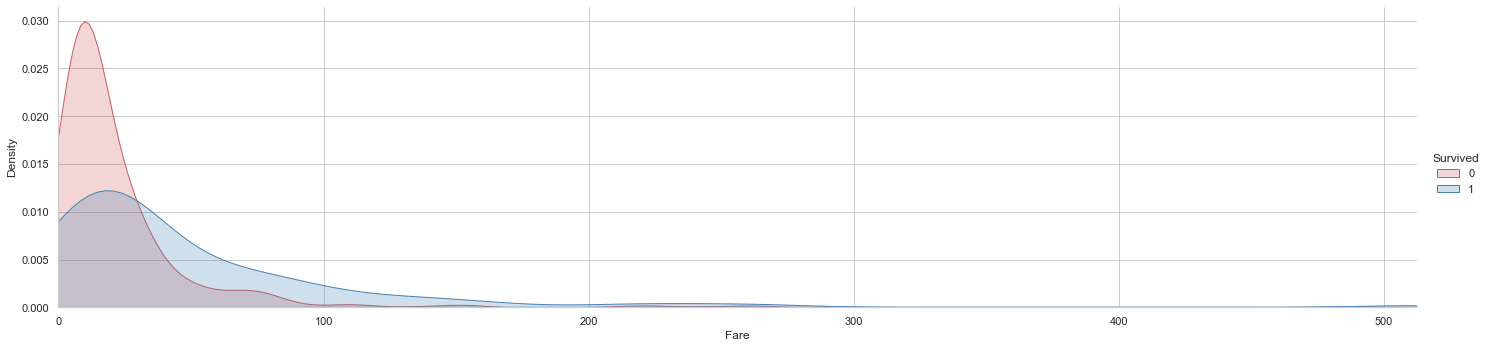

In [14]:
data = train_raw.filter(items = ["Survived", "Fare"])

facet = sns.FacetGrid(data, 
                      hue="Survived",
                      aspect= 4,
                      height = 5,
                      palette = {0: 'indianred', 1: 'steelblue'}
                      )

facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0, data['Fare'].max()))
facet.add_legend()

### Port of Embarkation Analysis

Observe how the majority of the passengers embarked on the S port. </br>
Those who embarked on the C port had a higher survival rate.

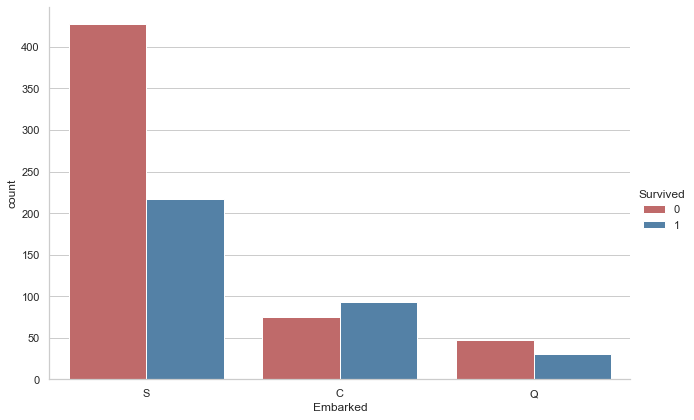

,Port of Embarkation,Survival Rate
1,C,55.36
2,Q,38.96
0,S,33.70


In [15]:
sns.catplot(x = 'Embarked', 
            hue="Survived", 
            kind = "count", 
            palette = {0: 'indianred', 1: 'steelblue'}, 
            data = train_raw, 
            height = 6, 
            aspect = 1.5
            )

plt.show()

sport = (train_raw["Survived"][train_raw["Embarked"] == 'S'].value_counts(normalize = True)[1]*100).round(2)
cport = (train_raw["Survived"][train_raw["Embarked"] == 'C'].value_counts(normalize = True)[1]*100).round(2)
qport = (train_raw["Survived"][train_raw["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100).round(2)

port_df = pd.DataFrame({
    "Port of Embarkation": ["S", "C", "Q"],
    "Survival Rate": [sport, cport, qport]})

# Sorting the 'Survival Rate':
port_df.sort_values(by = 'Survival Rate', ascending=False)


### Sex Analysis

Note how there were much more men than women aboard. </br>
The survival rate of women were much higher. *This is commonly used as a baseline on the predictive models (assuming that all women survived)*

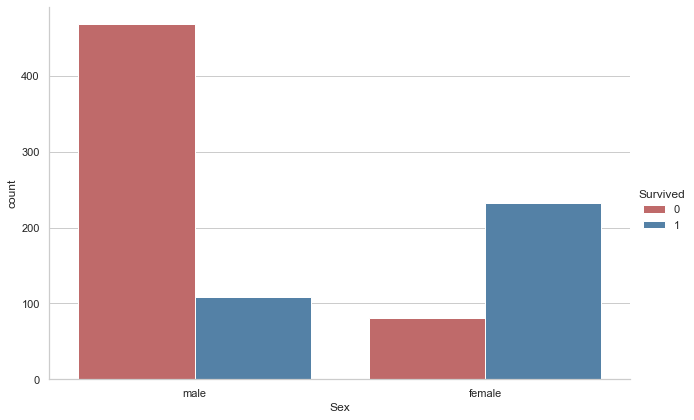

,Sex,Survival Rate
1,Female,74.20
0,Male,18.89


In [16]:
sns.catplot(x = 'Sex', 
            hue="Survived", 
            kind = "count", 
            palette = {0: 'indianred', 1: 'steelblue'}, 
            data = train_raw, 
            height = 6, 
            aspect = 1.5
            )

plt.show()

male = (train_raw["Survived"][train_raw["Sex"] == 'male'].value_counts(normalize = True)[1]*100).round(2)
female = (train_raw["Survived"][train_raw["Sex"] == 'female'].value_counts(normalize = True)[1]*100).round(2)

sex_df = pd.DataFrame({
    "Sex": ["Male", "Female"],
    "Survival Rate": [male, female]})

# Sorting the 'Survival Rate':
sex_df.sort_values(by = 'Survival Rate', ascending=False)

# Feature Engineering

Feature engineering (or feature extraction) is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

Source: https://en.wikipedia.org/wiki/Feature_engineering

In [17]:
# Creating a copy of the datatsets:
train = train_raw.copy()
test = test_raw.copy()

# List containing both datasets:
list_DS = [train, test]

## Dealing with missing data

### Approaching the "Cabin" feature

The amount of "Cabin" NA values is too high. A total of 77% of the data is missing (687 / 891). Therefore, we can adopt two different approaches:

* We can give up the use of this column, by deleting it from the dataset.
* We can infer that some people actually did have a cabin number and others did not. 

For this project, we'll go with the latter.

In [18]:
# Creating a new binary column named 'cabin_bin':

train["cabin_bin"] = (train["Cabin"].notnull().astype('int'))
test["cabin_bin"] = (test["Cabin"].notnull().astype('int'))

### Missing data from "Train" dataset

In [19]:
# Confirming that the "S" category is the most popular on the "Embarked" variable.

train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
# Confirming the mean and median of the "Age" variable.

train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Using the "S" category to fill "Embarked" NA's and using 28 (median) to fill "Age" NA's

na_values = {"Embarked": "S",
             "Age": 28.0}

train.fillna(value = na_values, inplace = True)

In [22]:
# Checking if all NA values have been treated.

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
cabin_bin        0
dtype: int64

### Missing data from "Test" dataset

In [23]:
# Confirming the mean and median of the "Fare" variable.

test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [24]:
# Confirming the mean and median of the "Age" variable.

test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [25]:
# Using the "S" category to fill "Embarked" NA's and using 27 (median) to fill "Age" NA's

na_values = {"Fare": 35.0,
             "Age": 27.0}

test.fillna(value = na_values, inplace = True)

In [26]:
# Checking if all NA values have been treated.

test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
cabin_bin        0
dtype: int64

## Transforming categorical variables to binary

### Adding the "Child" variable

In this section we'll add a new column named 'child'. For this, we'll consider as 'child' if the passenger's 'Age' were < 18

In [27]:
for dataset in list_DS:

    # Creating a new column 'child' with only 0's on both datasets:
    dataset["child"] = 0

    # If the passenger's 'Age' were < 18, then child = 1
    for i in range(len(dataset["PassengerId"])):
        if dataset["Age"][i] < 18:
            dataset["child"][i] = 1        
        else:
            pass   

In [28]:
# Cheking if the column 'child' was correcly inserted:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1


In [29]:
# Cheking if the column 'child' was correcly inserted:
test.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,1


### Adding the "Alone" variable

In this section we'll add a new column named 'alone'. For this, we'll consider as 'alone' if the passenger had no sibling, spouse, parent nor child aboard.

In [30]:
for dataset in list_DS:

    # Creating a new column 'alone' with only 0's on both datasets:
    dataset["alone"] = 0

    # If the passenger had 0 siblings/spouses and 0 parent/children aboard, then alone = 1
    for i in range(len(dataset["PassengerId"])):
        if dataset["SibSp"][i] == 0 and dataset["Parch"][i] == 0:
            dataset["alone"][i] = 1        
        else:
            pass

In [31]:
# Cheking if the column 'alone' was correcly inserted:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [32]:
# Cheking if the column 'alone' was correcly inserted:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0


### Adding the "Relatives" variable

In this section we'll add a new column named 'relatives'. For this, we'll consider a sum of the passenger's siblings, spouses, parentes and children aboard.

In [33]:
for dataset in list_DS:

    # Creating a new column 'relatives' with only 0's on both datasets:
    dataset["relatives"] = 0

    # The 'relatives' value will be the sum of siblings/spouses and parent/children:
    for i in range(len(dataset["PassengerId"])):
        dataset["relatives"][i] = dataset["SibSp"][i] + dataset["Parch"][i]  


In [34]:
# Cheking if the column 'relatives' was correcly inserted:
train.head(7) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0


In [35]:
# Cheking if the column 'relatives' was correcly inserted:
test.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone,relatives
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,1,1,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,0,1,0


### Converting "Sex" to binary

In this dataset, the 'Sex' variable is represented as 'male' and 'female'. In this section we'll create a new column named 'sex_bin' where:

male = 1 </br>
female = 0

In [36]:
# Creating a function that returns 0 for 'female' and 1 for 'male':
def sex_binary(value):
    if value == 'female':
        return 0
    else:
        return 1

In [37]:
# Applying the function on "train" dataset:

# Using the 'map()' function do apply the function above to all values in the 'Sex' column:
train['sex_bin'] = train['Sex'].map(sex_binary)

# Checking if the 'sex_bin' column was correctly created:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone,relatives,sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [38]:
# Applying the function on "test" dataset:

# Using the 'map()' function do apply the function above to all values in the 'Sex' column:
test['sex_bin'] = test['Sex'].map(sex_binary)

# Checking if the 'sex_bin' column was correctly created:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone,relatives,sex_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2,0


### Converting "Embarked" to binary

In this dataset, the 'Embarked' variable is represented as 'C', 'Q' and 'S'. In this section we'll create a new column named 'embarked_bin' where:

C = 0 </br>
Q = 1 </br>
S = 2

Next, based on the newly created 'embarked_bin' column, we'll use the 'OneHotEncoder' lib to create 3 new binary columns:

embarked_c </br>
embarked_q </br>
embarked_s

In [39]:
# Creating a function that returns 0 for 'C', 1 for 'Q' and 2 for 'S':

def embarked_binary(value):
    if value == 'C':
        return 0
    elif value == 'Q':
        return 1
    else:
        return 2

In [40]:
# Applying the function on "train" dataset:

# Using the 'map()' function do apply the function above to all values in the 'Sex' column:
train['embarked_bin'] = train['Embarked'].map(embarked_binary)

# Checking if the 'embarked_bin' column was correctly created:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone,relatives,sex_bin,embarked_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,2
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1


In [41]:
# Applying the function on "test" dataset:

# Using the 'map()' function do apply the function above to all values in the 'Sex' column:
test['embarked_bin'] = test['Embarked'].map(embarked_binary)

# Checking if the 'embarked_bin' column was correctly created:
test.tail(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone,relatives,sex_bin,embarked_bin
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1,0,0,1,0,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0,0,1,0,0,2
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,2
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,2
417,1309,3,"Peter, Master. Michael J",male,27.0,1,1,2668,22.3583,NaN,C,0,0,0,2,1,0


In [42]:
# Creating new encoded columns on the "train" dataset:

# Creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# Passing "embarked_bin" column (label encoded values of "Embarked")
enc_df = pd.DataFrame(enc.fit_transform(train[['embarked_bin']]).toarray())

# merge with main df bridge_df on key values
train = train.join(enc_df)

# Renaming the new columns:
new_names = {0: "embarked_c", 1: "embarked_q", 2: "embarked_s"}
train.rename(columns = new_names, inplace = True)

# Checking if the 3 new columns were correctly created:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,cabin_bin,child,alone,relatives,sex_bin,embarked_bin,embarked_c,embarked_q,embarked_s
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,0,1,1,2,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,0,0,2,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,0,0,1,0,2,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,2,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,...,Q,0,0,1,0,1,1,0.0,1.0,0.0


In [43]:
# Creating new encoded columns on the "test" dataset:

# Creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# Passing "embarked_bin" column (label encoded values of "Embarked")
enc_df = pd.DataFrame(enc.fit_transform(test[['embarked_bin']]).toarray())

# merge with main df bridge_df on key values
test = test.join(enc_df)

# Renaming the new columns:
new_names = {0: "embarked_c", 1: "embarked_q", 2: "embarked_s"}
test.rename(columns = new_names, inplace = True)

# Checking if the 3 new columns were correctly created:
test.tail(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_bin,child,alone,relatives,sex_bin,embarked_bin,embarked_c,embarked_q,embarked_s
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1,0,0,1,0,1,0.0,1.0,0.0
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0,0,1,0,0,2,0.0,0.0,1.0
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,2,0.0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,0,1.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,2,0.0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,2,0.0,0.0,1.0
417,1309,3,"Peter, Master. Michael J",male,27.0,1,1,2668,22.3583,NaN,C,0,0,0,2,1,0,1.0,0.0,0.0


### Feature Engineering the "Fare" variable

As we observed on the EDA section, the 'Fare' value can vary between 0 and 512.32. 

In this section, we'll use the Pandas qcut function (quantile-based discretization) to create the 'fare_cat' variable.

Therefore, each passenger will be classified in a fare category, ranging from 1 to 5, based on the 'Fare' value.

In [44]:
# Creating the 'fare_cat' variable on the train dataset:
train['fare_cat'] = pd.qcut(train['Fare'], 5, labels = [1, 2, 3, 4, 5])
train['fare_cat'] = train['fare_cat'].astype(int)

# Checking if the new variable was correctly created:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,cabin_bin,child,alone,relatives,sex_bin,embarked_bin,embarked_c,embarked_q,embarked_s,fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,1,1,2,0.0,0.0,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,0,1.0,0.0,0.0,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,2,0.0,0.0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,2,0.0,0.0,1.0,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,2,0.0,0.0,1.0,2


In [45]:
# Creating the 'fare_cat' variable on the test dataset:
test['fare_cat'] = pd.qcut(test['Fare'], 5, labels = [1, 2, 3, 4, 5])
test['fare_cat'] = test['fare_cat'].astype(int)

# Checking if the new variable was correctly created:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,cabin_bin,child,alone,relatives,sex_bin,embarked_bin,embarked_c,embarked_q,embarked_s,fare_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,1,0,1,1,0.0,1.0,0.0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,0,1,0,2,0.0,0.0,1.0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,1,1,0.0,1.0,0.0,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,1,0,1,2,0.0,0.0,1.0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,0,2,0,2,0.0,0.0,1.0,3


### Feature Engineering the "Name" variable

As we observed on the EDA section, practically all passengers had a title. This could be useful information that could indicate: social status, level of schooling, crew or not, etc.

In this section we'll create 5 new binary columns, based on custom groups as below:

navy = Col, Capt, Major </br>
scholar =  Dr, Master </br>
vip =  Countess, Don, Dona, Jonkheer, Lady, Sir </br>
women = Miss, Mlle, Mme, Mrs, Ms </br>
men = Mr, Rev


In [46]:
# Exploring name titles (both datasets):

list_DS = [train, test]

# Creating the 'title' column on both datasets, based on the title extraction from 'Name'
for dataset in list_DS:
    dataset['title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = True)


train_df = pd.crosstab(train['title'], train['Sex'])
test_df = pd.crosstab(test['title'], test['Sex'])

train_df.add(test_df, fill_value=0)

Sex,female,male
title,,
Capt,0.0,1.0
Col,0.0,4.0
Countess,1.0,0.0
Don,0.0,1.0
Dona,1.0,0.0
Dr,1.0,7.0
Jonkheer,0.0,1.0
Lady,1.0,0.0
Major,0.0,2.0


In [47]:
for dataset in list_DS:

    # Creating 5 new columns based on custom title groups:
    dataset["navy"] = 0
    dataset["scholar"] = 0
    dataset["vip"] = 0
    dataset["women"] = 0
    dataset["men"] = 0

    # Looping and assigning each title to its group:
    for i in range(len(dataset["PassengerId"])):
        if dataset["title"][i] in ['Col', 'Capt', 'Major']:
            dataset["navy"][i] = 1        
        
        elif dataset["title"][i] in ['Dr', 'Master']:
            dataset["scholar"][i] = 1

        elif dataset["title"][i] in ['Countess', 'Don', 'Dona', 'Jonkheer', 'Lady', 'Sir']:
            dataset["vip"][i] = 1

        elif dataset["title"][i] in ['Miss', 'Mlle', 'Mme', 'Mrs', 'Ms']:
            dataset["women"][i] = 1

        elif dataset["title"][i] in ['Mr', 'Rev']:
            dataset["men"][i] = 1
        
        else:
            pass

In [48]:
# Checking if the new columns were correctly added:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_c,embarked_q,embarked_s,fare_cat,title,navy,scholar,vip,women,men
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,1.0,1,Mr,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1.0,0.0,0.0,5,Mrs,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,1.0,2,Miss,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.0,0.0,1.0,5,Mrs,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.0,0.0,1.0,2,Mr,0,0,0,0,1


In [49]:
# Checking if the new columns were correctly added:

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,embarked_c,embarked_q,embarked_s,fare_cat,title,navy,scholar,vip,women,men
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0.0,1.0,0.0,2,Mr,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0.0,0.0,1.0,1,Mrs,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0.0,1.0,0.0,2,Mr,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0.0,0.0,1.0,2,Mr,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0.0,0.0,1.0,3,Mrs,0,0,0,1,0


### Feature Engineering the "Ticket" variable

All tickets have a number, although, some of them also have a preffix with some letters, such as: PC, C.A, SOTON/OQ, SC/PARIS, W.E.P, A/4, and many others.

For this variable, I opted for a simpler approach:

In this section, we'll create 7 new binary columns as follows:

ticket_A = ticket starts with the letter 'A' </br>
ticket_C = ticket starts with the letter 'C' </br>
ticket_F = ticket starts with the letter 'F' </br>
ticket_P = ticket starts with the letter 'P' </br>
ticket_S = ticket starts with the letter 'S' </br>
ticket_W = ticket starts with the letter 'W' </br>
ticket_N = ticket has only numbers

In [50]:
# Exploring some of the tickets

train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [51]:
for dataset in list_DS:

    # Creating 8 new columns based on custom ticket groups (both datasets):
    dataset["ticket_A"] = 0
    dataset["ticket_C"] = 0
    dataset["ticket_F"] = 0
    dataset["ticket_P"] = 0
    dataset["ticket_S"] = 0
    dataset["ticket_W"] = 0
    dataset["ticket_N"] = 0


    # Looping and assigning each title to its group:
    for i in range(len(dataset["PassengerId"])):
        if dataset["Ticket"][i].startswith('A'):
            dataset["ticket_A"][i] = 1   

        elif dataset["Ticket"][i].startswith('C'):
            dataset["ticket_C"][i] = 1

        elif dataset["Ticket"][i].startswith('F'):
            dataset["ticket_F"][i] = 1

        elif dataset["Ticket"][i].startswith('P'):
            dataset["ticket_P"][i] = 1

        elif dataset["Ticket"][i].startswith('S'):
            dataset["ticket_S"][i] = 1

        elif dataset["Ticket"][i].startswith('W'):
            dataset["ticket_W"][i] = 1
        
        else:
            dataset["ticket_N"][i] = 1 

In [52]:
# Checking if the new variables were correctly added:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,vip,women,men,ticket_A,ticket_C,ticket_F,ticket_P,ticket_S,ticket_W,ticket_N
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,0,0,1


In [53]:
# Checking if the new variables were correctly added:

test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,vip,women,men,ticket_A,ticket_C,ticket_F,ticket_P,ticket_S,ticket_W,ticket_N
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,...,0,0,1,1,0,0,0,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,0,0,0,0,0,1,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,1,0,0,0,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,...,0,0,1,0,0,0,0,0,0,1
417,1309,3,"Peter, Master. Michael J",male,27.0,1,1,2668,22.3583,NaN,...,0,0,0,0,0,0,0,0,0,1


## Removing useless variables


For the Feature engineering process, we ended up creating a lot of temporary columns.

In this section we'll remove all useless columns

In [54]:
# Checking all the columns currently on the dataset:

pd.DataFrame(train.columns)

,0
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [55]:
# Setting the column names that will be removed:
columns_to_remove = ["PassengerId", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "embarked_bin", "title"]

# Removing the useless columns from both datasets:
train.drop(columns = columns_to_remove, inplace = True)
test.drop(columns = columns_to_remove, inplace = True)

# Checking the final set of columns
pd.DataFrame(train.columns)

,0
0,Survived
1,Pclass
2,cabin_bin
3,child
4,alone
5,relatives
6,sex_bin
7,embarked_c
8,embarked_q
9,embarked_s


# Building the Model

Now that we have our datasets properly cleaned, we can start building some models to try and predict the survivors.

## Understanding the final dataset

In [56]:
print("The final 'train' dataset contains {} rows and {} columns.".format(train.shape[0], train.shape[1]))
print("The final 'test' dataset contains {} rows and {} columns.".format(test.shape[0], test.shape[1]))

The final 'train' dataset contains 891 rows and 23 columns.
The final 'test' dataset contains 418 rows and 22 columns.


In [57]:
# Checking out the statistical summary of the 'train' dataset:

pd.set_option('display.max_columns', None)
train.describe()

,Survived,Pclass,cabin_bin,child,alone,relatives,sex_bin,embarked_c,embarked_q,embarked_s,fare_cat,navy,scholar,vip,women,men,ticket_A,ticket_C,ticket_F,ticket_P,ticket_S,ticket_W,ticket_N
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.228956,0.126824,0.602694,0.904602,0.647587,0.188552,0.086420,0.725028,2.988777,0.005612,0.052750,0.005612,0.349046,0.586981,0.032548,0.052750,0.007856,0.072952,0.072952,0.014590,0.746352
std,0.486592,0.836071,0.420397,0.332962,0.489615,1.613459,0.477990,0.391372,0.281141,0.446751,1.415757,0.074743,0.223659,0.074743,0.476936,0.492653,0.177549,0.223659,0.088337,0.260203,0.260203,0.119973,0.435343
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# Checking out the statistical summary of the 'test' dataset:

pd.set_option('display.max_columns', None)
test.describe()

,Pclass,cabin_bin,child,alone,relatives,sex_bin,embarked_c,embarked_q,embarked_s,fare_cat,navy,scholar,vip,women,men,ticket_A,ticket_C,ticket_F,ticket_P,ticket_S,ticket_W,ticket_N
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.217703,0.098086,0.605263,0.839713,0.636364,0.244019,0.110048,0.645933,2.995215,0.004785,0.052632,0.002392,0.361244,0.578947,0.031100,0.071770,0.014354,0.078947,0.078947,0.014354,0.710526
std,0.841838,0.413179,0.297787,0.489380,1.519072,0.481622,0.430019,0.313324,0.478803,1.419283,0.069088,0.223564,0.048912,0.480937,0.494320,0.173797,0.258417,0.119088,0.269980,0.269980,0.119088,0.454062
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train / Test Split

Now we split our dataset and select which features will be used in the model (basically all except 'PassengerId' and 'Survived')

In [70]:
# Setting the seed:
np.random.seed(0)

In [60]:
# Setting the features:
features = ['Pclass', 'cabin_bin', 'child', 'alone', 'relatives',
            'sex_bin', 'embarked_c', 'embarked_q', 'embarked_s', 'fare_cat',
            'navy', 'scholar', 'vip', 'women', 'men',
            'ticket_A', 'ticket_C', 'ticket_F', 'ticket_P', 
            'ticket_S', 'ticket_W', 'ticket_N']

In [61]:
# Dataset that contains only the features:
x_train = train[features]

# Dataset that contains the targets:
y_train = train['Survived']

## Setting the Baseline

For the baseline, we'll assume that all women survived. Therefore, our goal is to build a model that can predict with an accuracy score that is higher than our baseline.

In [62]:
baseline = (x_train['sex_bin'] == 0).astype(np.int64)
baseline_acc = (np.mean(y_train == baseline) * 100).round(2)

print("Assuming that all women survived, we'll consider the baseline accuracy of {}%".format(baseline_acc))

Assuming that all women survived, we'll consider the baseline accuracy of 78.68%


## Testing different classifiers

For this project, I chose 5 very popular classifiers.

### Random Forest

In [71]:
# Creating Random Forest instance 
RFC = RandomForestClassifier()

# Setting the cross validation method
kfold = StratifiedKFold(n_splits = 10)

# Creating a dict with some parameters
rf_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators": [100, 300],
                 "criterion": ["gini"]
                 }

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsRFC = GridSearchCV(RFC,
                     param_grid = rf_param_grid, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1)

# Fitting the Grid Search with our data
gsRFC.fit(x_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
RFC_best = gsRFC.best_estimator_

# Getting the best accuracy score
RFC_score = (gsRFC.best_score_ * 100).round(2)

# Printing the best score
print("Random Forest best score: {}%".format(RFC_score))

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Random Forest best score: 84.29%


### Decision Tree

In [64]:
# Creating Decision Tree instance 
DTC = DecisionTreeClassifier()

# Setting the cross validation method
kfold = StratifiedKFold(n_splits = 10)

# Creating a dict with some parameters
dtc_param_grid = {"max_depth": [2, 4, 6, 8, 10, 12],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],              
              "criterion": ['gini', 'entropy']}

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsDTC = GridSearchCV(DTC,
                     param_grid = dtc_param_grid, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1)

# Fitting the Grid Search with our data
gsDTC.fit(x_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
DTC_best = gsDTC.best_estimator_

# Getting the best accuracy score
DTC_score = (gsDTC.best_score_ * 100).round(2)

# Printing the best score
print("Decision Tree best score: {}%".format(DTC_score))

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Decision Tree best score: 83.95%


### XGBoost

In [65]:
# Creating XGB instance 
XGB = XGBClassifier()

# Setting the cross validation method
kfold = StratifiedKFold(n_splits=10)

# Creating a dict with some parameters
xgb_params = {'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1, 1.5, 2, 5],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'max_depth': [3, 4, 5]
             }

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsXGB = GridSearchCV(XGB,
                     param_grid = xgb_params, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1)

# Fitting the Grid Search with our data
gsXGB.fit(x_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
XGB_best = gsXGB.best_estimator_

# Getting the best accuracy score
XGB_score = (gsXGB.best_score_ * 100).round(2)

# Printing the best score
print("XGBoost best score: {}%".format(XGB_score))

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
[21:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost best score: 83.39%


### Logistic Regression

In [66]:
# Creating Logistic Regression instance 
LRC = LogisticRegression()

# Setting the cross validation method
kfold = StratifiedKFold(n_splits = 10)

# Creating a dict with some parameters
lrc_params = {'penalty': ['l1', 'l2'],
              'C': np.logspace(-4, 4, 50),
              'max_iter': [100, 200, 300],
              'fit_intercept': [True, False]
             }

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsLRC = GridSearchCV(LRC,
                     param_grid = lrc_params, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1)

# Fitting the Grid Search with our data
gsLRC.fit(x_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
LRC_best = gsLRC.best_estimator_

# Getting the best accuracy score
LRC_score = (gsLRC.best_score_ * 100).round(2)

# Printing the best score
print("Logistic Regression best score: {}%".format(LRC_score))

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Logistic Regression best score: 83.17%


### Gradient Boosting Classifier

In [67]:
# Creating GBC instance 
GBC = GradientBoostingClassifier()

# Setting the cross validation method
kfold = StratifiedKFold(n_splits=10)

# Creating a dict with some parameters
gb_param_grid = {'loss': ["deviance"],
                 'n_estimators': [100, 200, 300],
                 'learning_rate': [0.1, 0.05, 0.01],
                 'max_depth': [4, 8],
                 'min_samples_leaf': [100, 150],
                 'max_features': [0.3, 0.1] 
                 }

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsGBC = GridSearchCV(GBC,
                     param_grid = gb_param_grid, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1
                     )

# Fitting the Grid Search with our data
gsGBC.fit(x_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
GBC_best = gsGBC.best_estimator_

# Getting the best accuracy score
GBC_score = (gsGBC.best_score_ * 100).round(2)

# Printing the best score
print("Gradient Boosting Classifier best score: {}%".format(GBC_score))

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Gradient Boosting Classifier best score: 82.15%


### Comparing the results

In [72]:
# Creating a result dataframe containing the average scores:
result_df = pd.DataFrame({
    "Classifier": ["Random Forest", "Decision Tree", "XGBoost", "Logistic Regression", "Gradient Boosting Classifier"],
    "Best Score": [RFC_score, DTC_score, XGB_score, LRC_score, GBC_score]
})

# Sorting the average scores:
result_df.sort_values(by='Best Score', ascending=False)

,Classifier,Best Score
0,Random Forest,84.29
1,Decision Tree,83.95
2,XGBoost,83.39
3,Logistic Regression,83.17
4,Gradient Boosting Classifier,82.15


As we can se on the heatmap below, the prediction results of all 5 classifiers are highly correlated (above 0.8)

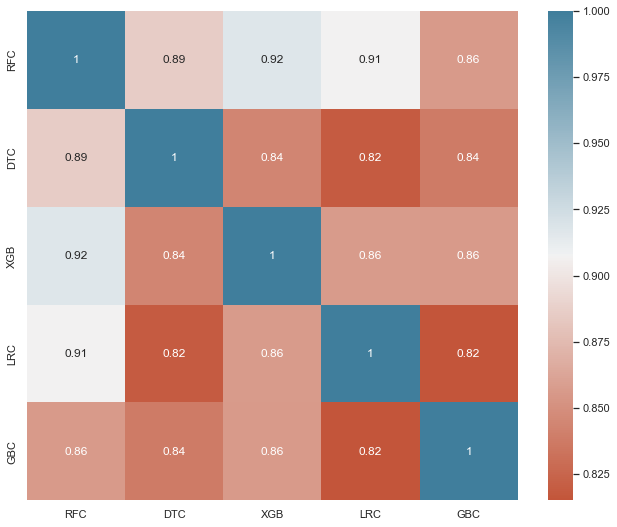

In [73]:
# Creating a pandas Series with the predictions of each classifier:
test_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_DTC = pd.Series(DTC_best.predict(test), name="DTC")
test_XGB = pd.Series(XGB_best.predict(test), name="XGB")
test_LRC = pd.Series(LRC_best.predict(test), name="LRC")
test_GBC = pd.Series(GBC_best.predict(test), name="GBC")

# Concatenating all classifier results
classifier_results = pd.concat([test_RFC, test_DTC, test_XGB, test_LRC, test_GBC], axis = 1)

# Creating a correlation between the results of each classifier
classifier_corr = classifier_results.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap = True)

# Plotting the heatmap showing the correlation between results of all 5 classifiers
g = sns.heatmap(classifier_corr,
               annot=True,
               ax = ax, 
               cmap = cmap)

## Final thoughts

In our experiments, the Random Forest wielded the best score. Therefore, we could select it as our algorithm, or we could use ensemble modeling to use all 5 algorithms and get a combined result based on a voting algorithm.

I prepared a .py script that uses ensemble modeling to get the final .csv submission file. You can check it out here:

https://github.com/augusto-gontijo/ml-titanic/tree/main/Submission